In [44]:
from pepys_import.core.store.data_store import DataStore
import config
import pandas as pd
from sqlalchemy import create_engine
import geopandas as gpd
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets
import matplotlib.pyplot as plt
import hvplot
import hvplot.pandas
import folium
import numpy as np

## Connect to database

In [2]:
ds = DataStore(
            db_username=config.DB_USERNAME,
            db_password=config.DB_PASSWORD,
            db_host=config.DB_HOST,
            db_port=config.DB_PORT,
            db_name=config.DB_NAME,
            db_type=config.DB_TYPE,
        )

   @@@@ @@@@@        ______                      _                            _   
 @@@@@ @@..@@@@      | ___ \                    (_)                          | |  
  @@@     @@@@@@     | |_/ /__ _ __  _   _ ___   _ _ __ ___  _ __   ___  _ __| |_ 
  @@@     @@@@@@@@   |  __/ _ \ '_ \| | | / __| | | '_ ` _ \| '_ \ / _ \| '__| __|
 @@@@.     @@@@@@@   | | |  __/ |_) | |_| \__ \ | | | | | | | |_) | (_) | |  | |_ 
 @@ #@@ @   ...@@@@@ \_|  \___| .__/ \__, |___/ |_|_| |_| |_| .__/ \___/|_|   \__|
 @@   &        @@@@@            | |     __/ | ______          | |                   
Software Version :  0.0.33



Database Type :  postgres
Database Name :  pepys_solent
Database Host :  localhost
------------------------------------------------------------------------------


In [3]:
engine = create_engine(ds.connection_string, future=False)

## Query data for specific platform

In [16]:
with ds.session_scope():
    platform_id = ds.session.query(ds.db_classes.Platform.platform_id).filter(ds.db_classes.Platform.name == "308262000").one()[0]

In [17]:
platform_id

UUID('2b4de79e-1fad-4070-a6f3-1b7c29599728')

In [18]:
sql = f"SELECT * FROM pepys.states_for(null, null, null, null, null, '{{{platform_id}}}')"
data = gpd.read_postgis(sql,
                        engine, geom_col='state_location')

In [21]:
data.head()

,state_id,state_time,sensor_name,platform_name,platformtype_name,nationality_name,state_location,elevation,heading,course,speed,reference
0,00152e8e-692f-42d8-afe5-f7e50fea0eda,2016-01-11 09:03:14.709,AIS,308262000,Unknown,Unknown,POINT (-0.95887 50.67108),None,None,3.300418,5.350222,SolentAIS_20160111_083249.csv
1,01c461be-aa02-459c-8040-acc6cd4d483c,2016-01-11 09:55:55.440,AIS,308262000,Unknown,Unknown,POINT (-1.06896 50.53745),None,None,4.127704,5.401667,SolentAIS_20160111_083249.csv
2,01d859fd-e004-4bdd-a7b4-5850dcae9699,2016-01-11 09:29:05.957,AIS,308262000,Unknown,Unknown,POINT (-0.98437 50.59680),None,None,3.914774,5.761778,SolentAIS_20160111_083249.csv
3,0306f98f-8636-4872-a968-6a9a1f4c1225,2016-01-11 08:49:55.500,AIS,308262000,Unknown,Unknown,POINT (-0.95830 50.70128),None,None,2.820452,3.704000,SolentAIS_20160111_083249.csv
4,03a9c7fe-62ab-4f95-8df7-660709f10c85,2016-01-11 09:51:44.755,AIS,308262000,Unknown,Unknown,POINT (-1.05497 50.54570),None,None,3.754203,5.504556,SolentAIS_20160111_083249.csv


## Static plot of attribute data

Text(0.5, 1.0, 'Example static plot')

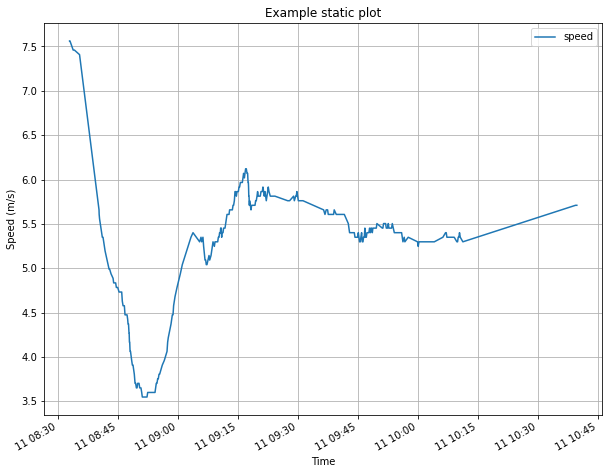

In [20]:
_ = data.plot(kind='line', x='state_time', y='speed', grid=True, figsize=(10, 8))
plt.xlabel("Time")
plt.ylabel("Speed (m/s)")
plt.title("Example static plot")

## Interactive plot of attribute data

In [22]:
pd.options.plotting.backend = 'hvplot'

In [31]:
data = data.set_index(data.state_time)

In [38]:
data.speed.plot(kind='line', y='speed',
                label="Raw speed",
                grid=True,
                title="Example interactive plot (speed vs time)", xlabel="Time", ylabel="Speed (m/s)")

:Curve   [state_time]   (speed)

## Scatter plot of attributes

In [45]:
data.course = np.rad2deg(data.course)

In [49]:
data.plot.scatter(x='course', y='speed',
                  xlabel="Course (degrees)", ylabel="Speed (m/s)",
                  title="Example scatter plot - course vs speed",
                  grid=True)

:Scatter   [course]   (speed)